In [46]:
import numpy as np
import seaborn as sns
sns.set(style="whitegrid") #makes the graph look a little nicer
import matplotlib.pyplot as plt #we load the library that contains the plotting capabilities
from operator import itemgetter #we use this in the sorting procecure, below

In [52]:
#no_call, dup, del
confusion_matrix={
    "Control_FREEC":
        [[7395972, 6874622, 7058879],
        [1324171, 1284308, 1248352],
        [7542829, 6966242, 7455429]]
    ,
    "DECoNT_Control_FREEC":
        [[5784309, 5378215, 5518070],
        [589108, 734984, 450704],
        [9889555, 9011973, 9793886]]
    ,
    "CNVkit":
        [[2047096, 1938886, 1921362],
        [299837, 296390, 284186],
        [1049869, 974144, 1043521]]
    ,	
    "DECoNT_CNVkit":
        [[2290912, 2124041, 2205063],
        [557237, 550779, 521755],
        [548653, 534600, 522251]]
    ,	
    "XHMM":
        [[47451741, 417408, 302298],
        [38137, 32298, 3916],
        [33510, 4648, 26294]]
    ,	
    "DECoNT_XHMM":
        [[47489289, 419118, 303044],
        [17296, 34214, 953],
        [16803, 1022, 28511]]
    ,	
    "CONIFER":
        [[ 15551274, 174086, 107047],
        [ 9484, 1263, 1280],
        [ 639, 267, 422]]
    ,	
    "DECoNT_CONIFER":
       [ [ 15554000, 174200, 107128],
        [ 3323, 666, 391],
        [ 4074, 750, 1230]]
    ,	
    "CODEX2":
        [[31430578, 300514, 218459],
        [7445915, 71440, 51836],
        [8646895, 82400, 62213]]
    ,	
    "DECoNT_CODEX2":
        [[ 41897336, 395586, 283708],
        [ 2834559, 38655, 24316],
        [ 2791493, 20113, 24484]]
    ,	
    "ECOLE":
        [[ 29771946, 148288, 29050],
        [ 52583, 133129, 3650],
        [ 21013, 1281, 111866]]	
    }

In [64]:
def del_npv(method):
    FN = (confusion_matrix[method][0][2]+confusion_matrix[method][1][2])
    TN = (confusion_matrix[method][0][0] + confusion_matrix[method][0][1]) + (confusion_matrix[method][1][0] + confusion_matrix[method][1][1])
    return TN/(TN+FN)

def dup_npv(method):
    FN = (confusion_matrix[method][0][1]+confusion_matrix[method][2][1])
    TN = (confusion_matrix[method][0][0] + confusion_matrix[method][0][2]) + (confusion_matrix[method][2][0] + confusion_matrix[method][2][2])
    return TN/(TN+FN)

def overall_npv(method):
    return (del_npv(method)+dup_npv(method))/2

In [68]:
print(np.sum(confusion_matrix["ECOLE"][0]))
print(np.sum(confusion_matrix["ECOLE"][1]))
print(np.sum(confusion_matrix["ECOLE"][2]))

29949284
189362
134160


In [132]:
Control_FREEC = [0.339, 0.332, 0.336, 0.472, 0.084, 0.276, 0.394, 0.135, 0.303, del_npv("Control_FREEC"),dup_npv("Control_FREEC"),overall_npv("Control_FREEC") ]
CNVkit = [0.340, 0.336, 0.338, 0.321, 0.092, 0.206, 0.330, 0.144, 0.255, del_npv("CNVkit"),dup_npv("CNVkit"),overall_npv("CNVkit")]
XHMM = [0.407, 0.434, 0.421, 0.080, 0.071, 0.076, 0.134, 0.122, 0.129, del_npv("XHMM"),dup_npv("XHMM"),overall_npv("XHMM")]
CONIFER = [0.317, 0.105, 0.211, 0.004, 0.007, 0.006, 0.008, 0.013, 0.012, del_npv("CONIFER"),dup_npv("CONIFER"),overall_npv("CONIFER")]
CODEX2 = [0.007, 0.009, 0.008, 0.187, 0.157, 0.172, 0.013, 0.017, 0.015, del_npv("CODEX2"),dup_npv("CODEX2"),overall_npv("CODEX2")]
DECoNT_Control_FREEC = [0.341, 0.414, 0.371, 0.621, 0.049, 0.335, 0.440, 0.087, 0.352, del_npv("DECoNT_Control_FREEC"),dup_npv("DECoNT_Control_FREEC"),overall_npv("DECoNT_Control_FREEC")]
DECoNT_CNVkit = [0.325, 0.338, 0.332, 0.160, 0.171, 0.165, 0.214, 0.227, 0.220, del_npv("DECoNT_CNVkit"),dup_npv("DECoNT_CNVkit"),overall_npv("DECoNT_CNVkit")]
DECoNT_XHMM = [0.615, 0.652, 0.634, 0.086, 0.075, 0.081, 0.151, 0.135, 0.144, del_npv("DECoNT_XHMM"),dup_npv("DECoNT_XHMM"),overall_npv("DECoNT_XHMM")]
DECoNT_CONIFER = [0.203, 0.152, 0.178, 0.011, 0.003, 0.007, 0.021, 0.006, 0.013, del_npv("DECoNT_CONIFER"),dup_npv("DECoNT_CONIFER"),overall_npv("DECoNT_CONIFER")]
DECoNT_CODEX2 = [0.009, 0.013, 0.011, 0.074, 0.085, 0.080, 0.016, 0.023, 0.019, del_npv("DECoNT_CODEX2"),dup_npv("DECoNT_CODEX2"),overall_npv("DECoNT_CODEX2")]
ECOLE = [0.834, 0.703, 0.769, 0.531, 0.470, 0.501, 0.649, 0.563, 0.607, del_npv("ECOLE"),dup_npv("ECOLE"),overall_npv("ECOLE")]



performance = {"Control_FREEC":[Control_FREEC,"orange"],"CNVkit":[CNVkit,"purple"],"XHMM":[XHMM,"gold"],"CONIFER":[CONIFER,"springgreen"],"CODEX2":[CODEX2,"blue"],"ECOLE":[ECOLE,"red"]}
decont_performance = {"DECoNT_Control_FREEC":[DECoNT_Control_FREEC,"orange"],"DECoNT_CNVkit":[DECoNT_CNVkit,"purple"],"DECoNT_XHMM":[DECoNT_XHMM,"yellow"],"DECoNT_CONIFER":[DECoNT_CONIFER,"springgreen"],"DECoNT_CODEX2":[DECoNT_CODEX2,"blue"],"ECOLE":[ECOLE,"red"]}


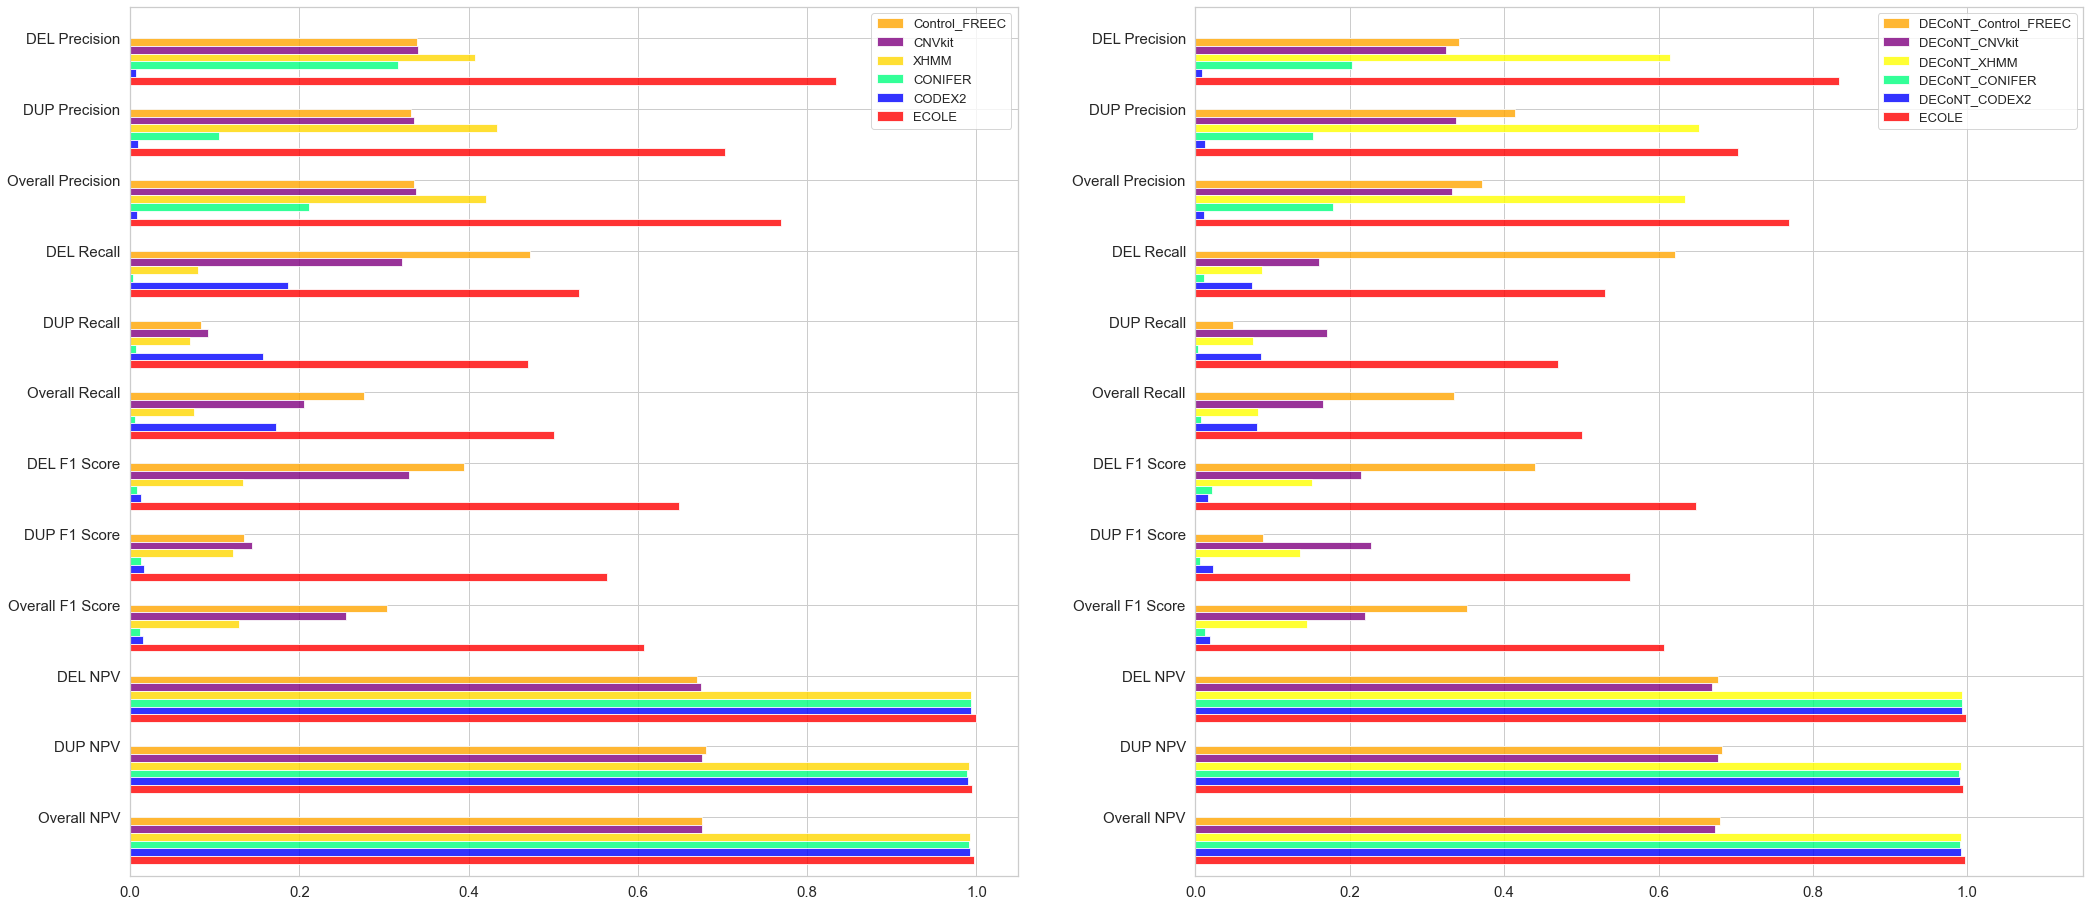

In [184]:
performanceTypes = ['DEL Precision','DUP Precision','Overall Precision','DEL Recall','DUP Recall','Overall Recall','DEL F1 Score','DUP F1 Score','Overall F1 Score', 'DEL NPV', "DUP NPV", "Overall NPV",]



ind = np.arange(len(performanceTypes))
width=0.11 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(35,16))
ax1 = plt.subplot(1, 2, 1)
for i,caller in enumerate(performance.keys()):
    ax1.barh(ind-i*width, list(reversed(performance[caller][0])), width, align='center', alpha=0.8, label=caller, color=performance[caller][1]) #a horizontal bar chart (use .bar instead of .barh for vertical)
ax1.set(yticks=ind + width/2, yticklabels=list(reversed(performanceTypes)), ylim=[2*width - 1, len(performanceTypes)-0.5])
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(loc="upper right",fontsize=13)

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
for i,caller in enumerate(decont_performance.keys()):
    ax2.barh(ind-i*width, list(reversed(decont_performance[caller][0])), width, align='center', alpha=0.8, label=caller, color=decont_performance[caller][1]) #a horizontal bar chart (use .bar instead of .barh for vertical)
ax2.set(yticks=ind + width/2, yticklabels=list(reversed(performanceTypes)), ylim=[2*width - 1, len(performanceTypes)-0.5 ], xlim=[0,1.15])
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.legend(loc="upper right",fontsize=13)


#plt.xlabel('')
plt.show()

In [89]:
list(reversed(performanceTypes))

['Overall NPV',
 'DUP NPV',
 'DEL NPV',
 'Overall F1 Score',
 'DUP F1 Score',
 'DEL F1 Score',
 'Overall Recall',
 'DUP Recall',
 'DEL Recall',
 'Overall Precision',
 'DUP Precision',
 'DEL Precision']